Experimento GA.03 - O caixeiro com gasolina infinita
========================================



## Introdução



No experimento A.06, vimos o problema do caixeiro viajante - um viajante precisa encontrar o menor caminho para transitar entre as cidades que precisa passar, sem que passe duas vezes na mesma.

Neste notebook, vamos abordar o problema vizando encontrar justamente o CONTRÁRIO, o PIOR caminho possível para o nosso motorista.
Como anteriormente no experimento A.06 usamos uma seleção por minimização(ja que o objetivo era o menor caminho), agora vamos usar uma seleção por maximização.




## Objetivo



Queremos encontrar o caminho mais longo possível para este percurso, maximizando a distância



## Importações



In [1]:
import random
from itertools import permutations

from funcoes import cria_cidades

from funcoes_playground import populacao_inicial_cv as cria_populacao_inicial
from funcoes_playground import funcao_objetivo_pop_cv
from funcoes_playground import funcao_objetivo_cv
from funcoes_playground import selecao_torneio_max  as funcao_selecao # esse já temos!
from funcoes_playground import cruzamento_ordenado as funcao_cruzamento
from funcoes_playground import mutacao_de_troca as funcao_mutacao

import matplotlib.pyplot as plt
import networkx as nx


## Códigos e discussão



In [2]:
cidades = cria_cidades(6)
cidades

nomes = list(cidades.keys())
nomes

random.shuffle(nomes)
nomes

['Cidade 1', 'Cidade 0', 'Cidade 4', 'Cidade 2', 'Cidade 3', 'Cidade 5']

In [3]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_CIDADES=7
CIDADES = cria_cidades(NUMERO_CIDADES)

In [4]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [5]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = 0  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    

Pode-se perceber que o código é quase idêntico ao problema de minimização, apenas alteramos os fatores de seleção dos nossos indíviduos, prezandoo pelos maiores valores possíveis.

In [6]:
# Busca testando todas as permutações

melhor_fitness_ever = 0

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [7]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 6', 'Cidade 0', 'Cidade 5', 'Cidade 2', 'Cidade 1', 'Cidade 3', 'Cidade 4'] com distância: 5.076694188411806

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 5', 'Cidade 2', 'Cidade 1', 'Cidade 3', 'Cidade 4', 'Cidade 6') com distância: 5.076694188411806


#### Podemos ver que ambos os resultados condizem, o que nos diz que o código conseguiu encontrar a opção mais longa.

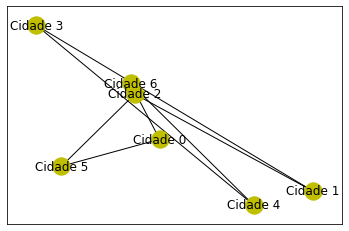

In [8]:
# Representação gráfica:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'y')

Vamos ver agora como que o valor de cada indivíduo vai aumentando conforme o tempo e os selecionados vão adquirindo valores cada vez maiores

In [9]:
print(fitness)

[4.869673701796063, 5.076694188411806, 5.076694188411806, 5.076694188411806, 4.5887675884595, 4.724689706455835, 4.912278388418817, 4.912278388418817, 4.596513344287816, 4.596513344287816, 5.052411165013117, 5.076694188411806, 4.631010758614542, 4.912278388418817, 4.936906422853226, 4.936906422853226, 5.076694188411806, 5.076694188411806, 4.912278388418817, 4.912278388418817, 5.059079052691172, 4.912278388418817, 5.076694188411806, 4.869673701796063, 5.076694188411806, 5.076694188411806, 4.912278388418817, 5.076694188411806, 5.076694188411806, 4.869673701796063, 4.936906422853226, 5.076694188411806, 3.8110801756167696, 3.8110801756167696, 5.076694188411806, 4.9331471589263804, 3.8110801756167696, 3.8110801756167696, 4.515174149842132, 4.515174149842132, 5.076694188411806, 5.076694188411806, 4.936906422853226, 5.076694188411806, 4.502265171858727, 4.470569997647812, 5.04499901420089, 4.936906422853226, 5.076694188411806, 5.076694188411806]


In [10]:
lista = fitness.copy()

lista.sort()

print(lista)

[3.8110801756167696, 3.8110801756167696, 3.8110801756167696, 3.8110801756167696, 4.470569997647812, 4.502265171858727, 4.515174149842132, 4.515174149842132, 4.5887675884595, 4.596513344287816, 4.596513344287816, 4.631010758614542, 4.724689706455835, 4.869673701796063, 4.869673701796063, 4.869673701796063, 4.912278388418817, 4.912278388418817, 4.912278388418817, 4.912278388418817, 4.912278388418817, 4.912278388418817, 4.912278388418817, 4.9331471589263804, 4.936906422853226, 4.936906422853226, 4.936906422853226, 4.936906422853226, 4.936906422853226, 5.04499901420089, 5.052411165013117, 5.059079052691172, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806, 5.076694188411806]


## Conclusão



Como podemos perceber, o código é quase idêntico ao da aula de A.06 do caixeiro viajante, entretando como um problema de maximização.
Vemos que conforme o algoritmo vai correndo, os valores para o nosso fitness vai aumentando, portanto é possível concluir que o código está funcionando de forma correta pois, temos os faotres de cruzamento e mutação auxliando, juntamente ao de seleção, a passar os maiores valores geração após geração.



## Referências consultadas



1. Github do professor Daniel (https://github.com/drcassar/aula_redes/tree/main)

## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.

